在 PyTorch 中，`nn.ModuleDict()` 和 `nn.Parameter()` 都是常用的模块和参数管理工具。它们分别用于管理子模块（如层和模型组件）和可训练参数。

`nn.ModuleDict()`

`nn.ModuleDict()` 是 `torch.nn.Module` 的一个容器，用于存储子模块。与普通的 Python 字典不同，`ModuleDict` 是专门为 PyTorch 中的子模块设计的，它确保所有存储在其中的模块（如 `nn.Linear`, `nn.Conv2d` 等）都能自动注册为模型的一部分，并且能够参与训练（包括自动求导）。

主要特点：
* 可以通过键值对存储多个子模块，键通常是字符串类型（表示层的名称），值是一个 `nn.Module` 类型的对象（表示具体的层）。
* `ModuleDict` 会将存储的子模块自动加入到模型的 `parameters()` 和 `modules()` 中，从而使它们能参与梯度计算和优化。

In [2]:
import torch
import torch.nn as nn

class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        # 使用 ModuleDict 来存储多个子模块
        self.layers = nn.ModuleDict({
            'layer1': nn.Linear(10, 20),
            'layer2': nn.Linear(20, 30),
            'layer3': nn.Linear(30, 40)
        })
    
    def forward(self, x):
        # 可以通过 ModuleDict 访问各个子模块
        x = self.layers['layer1'](x)
        x = self.layers['layer2'](x)
        x = self.layers['layer3'](x)
        return x

# 创建模型并打印
model = SimpleModel()
print(model)

SimpleModel(
  (layers): ModuleDict(
    (layer1): Linear(in_features=10, out_features=20, bias=True)
    (layer2): Linear(in_features=20, out_features=30, bias=True)
    (layer3): Linear(in_features=30, out_features=40, bias=True)
  )
)


在上述代码中，`self.layers` 是一个 `nn.ModuleDict()`，其中包含了三个线性层 `layer1`, `layer2`, 和 `layer3`。在 `forward` 方法中，可以通过 `self.layers['layer1']` 等访问每个子模块。

优点：
自动注册参数：所有的子模块会被自动注册，PyTorch 可以跟踪它们。
易于管理：它使得处理多个子模块（特别是当你有多个类似的层时）变得更加简洁和灵活。

`nn.Parameter()`
`nn.Parameter()` 是一个用来表示可训练参数的类。它通常用于将一个张量（tensor）转变为模型的参数，使得它能够在反向传播时计算梯度，并被优化器更新。

主要特点：
它本质上是一个 `Tensor`，但是 `Parameter` 会被自动注册为模型的可训练参数。
`Parameter` 对象会被自动加入到模型的 `parameters()` 方法返回的参数列表中，因此优化器会自动优化它。

In [3]:
import torch
import torch.nn as nn

class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        # 使用 Parameter 来创建一个可训练的参数
        self.weight = nn.Parameter(torch.randn(10, 5))  # 一个 10x5 的权重矩阵
    
    def forward(self, x):
        return torch.matmul(x, self.weight)  # 将输入与权重矩阵相乘

# 创建模型并打印
model = SimpleModel()
print(model)


SimpleModel()


在上面的代码中，`self.weight` 是一个 `nn.Parameter()`，它表示模型中的一个权重矩阵。该矩阵会自动成为模型的可训练参数，在训练过程中会被更新。

优点：
自动注册：通过 `nn.Parameter()` 创建的张量会被自动注册为模型的参数。
梯度计算：`Parameter` 会被视为一个需要求导的张量，能够参与反向传播和梯度更新。

区别总结：
* `nn.ModuleDict()` 是一个容器，用来存储多个 `nn.Module` 子模块，它可以帮助管理多个子模块，并且将它们注册为模型的一部分。
  * 例如，用于存储层、嵌入层、注意力层等。
* nn.Parameter() 是一个特殊的张量，表示模型的可训练参数，它会自动被注册为模型的参数，并参与梯度计算。
例如，用于表示模型的权重、偏置等需要训练的参数。
示例结合：
在之前的 `GraphMSE` 代码中，`nn.ModuleDict()` 用来存储每个元路径的 MLP 层，而 `nn.Parameter()` 用来表示每个节点类型的权重。

```python
self.type_weight[node_type] = nn.Parameter(torch.Tensor(input_dim, pre_embed_dim))
```

这里，`self.type_weight[node_type]` 是一个 `nn.Parameter()`，它是一个可训练的权重矩阵。

In [2]:
import torch

def cosine_similarity(A, B):
    # 计算余弦相似度
    dot_product = torch.dot(A, B)
    norm_A = torch.norm(A)
    norm_B = torch.norm(B)
    print(dot_product / (norm_A * norm_B))
    return dot_product / (norm_A * norm_B)

def average_cosine_similarity(tensor):
    num_vectors = tensor.shape[0]
    total_similarity = 0
    count = 0
    
    # 两两比较
    for i in range(num_vectors):
        for j in range(i + 1, num_vectors):
            A = tensor[i]
            B = tensor[j]
            total_similarity += cosine_similarity(A, B)
            count += 1
    
    # 计算平均值
    return total_similarity / count

# 示例数据
data = torch.tensor([[1, 2, 3, 4, 5], 
                     [6, 7, 8, 9, 10], 
                     [11, 12, 13, 14, 15]], dtype=torch.float32)

# 计算平均余弦相似度
avg_similarity = average_cosine_similarity(data)
print(f"平均余弦相似度: {avg_similarity.item()}")


tensor(0.9650)
tensor(0.9453)
tensor(0.9978)
平均余弦相似度: 0.9693587422370911


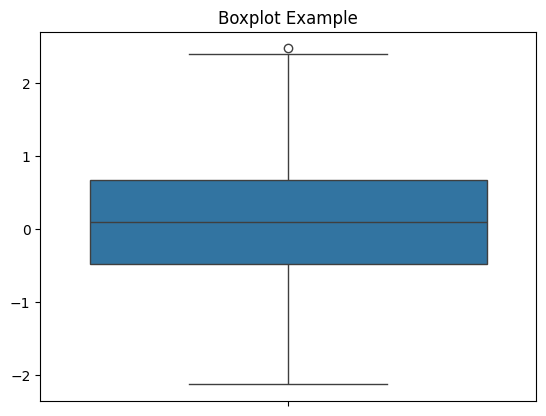

[ 1.3315865   0.71527897 -1.54540029 -0.00838385  0.62133597 -0.72008556
  0.26551159  0.10854853  0.00429143 -0.17460021  0.43302619  1.20303737
 -0.96506567  1.02827408  0.22863013  0.44513761 -1.13660221  0.13513688
  1.484537   -1.07980489 -1.97772828 -1.7433723   0.26607016  2.38496733
  1.12369125  1.67262221  0.09914922  1.39799638 -0.27124799  0.61320418
 -0.26731719 -0.54930901  0.1327083  -0.47614201  1.30847308  0.19501328
  0.40020999 -0.33763234  1.25647226 -0.7319695   0.66023155 -0.35087189
 -0.93943336 -0.48933722 -0.80459114 -0.21269764 -0.33914025  0.31216994
  0.56515267 -0.14742026 -0.02590534  0.2890942  -0.53987907  0.70816002
  0.84222474  0.2035808   2.39470366  0.91745894 -0.11227247 -0.36218045
 -0.23218226 -0.5017289   1.12878515 -0.69781003 -0.08112218 -0.52929608
  1.04618286 -1.41855603 -0.36249918 -0.12190569  0.31935642  0.4609029
 -0.21578989  0.98907246  0.31475378  2.46765106 -1.50832149  0.62060066
 -1.04513254 -0.79800882  1.98508459  1.74481415 -1.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 生成一些随机数据
np.random.seed(10)
data = np.random.normal(loc=0, scale=1, size=100)

# 使用seaborn绘制箱线图
sns.boxplot(data=data)

# 设置标题
plt.title("Boxplot Example")

# 显示图形
plt.show()
print(data)
